<a href="https://colab.research.google.com/github/eshikapathak/Portfolio-Optimization-RL/blob/main/Final_Code/786_project_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
SNP_no_RC = '/content/drive/My Drive/Sem 2/DL/Project Results/S&P_no_RC/'
SNP_w_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/S&P_w_RC/'
DJI_no_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/DJI_no_RC/'
DJI_w_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/DJI_w_RC/'
Ablation =  '/content/drive/My Drive/Sem 2/DL/Project Results/Ablation_V/'

In [103]:
index = "dow"
algo = "sac"

In [104]:
if index == "snp":
  dji_sac_no_RC = pd.read_csv(SNP_no_RC + f'df_{algo}original.csv')
  dji_sac_w_RC = pd.read_csv(SNP_w_RC + f'df_{algo}with_RC.csv')
  set_index = pd.read_csv('SNP.csv')
  dji_MVO = pd.read_csv(SNP_no_RC + 'df_MVOoriginal.csv')
else:
  dji_sac_no_RC = pd.read_csv(DJI_no_RC + f'df_{algo}original.csv')
  dji_sac_w_RC = pd.read_csv(DJI_w_RC + f'df_{algo}with_RC.csv')
  set_index = pd.read_csv('DOW.csv')
  dji_MVO = pd.read_csv(DJI_no_RC + 'df_MVOoriginal.csv')


In [105]:
def correct_date(df):
  df['date'] = pd.to_datetime(df['date'])
  return df

In [106]:
set_index = correct_date(set_index)
dji_sac_no_RC = correct_date(dji_sac_no_RC)
dji_sac_w_RC = correct_date(dji_sac_w_RC)
dji_MVO = correct_date(dji_MVO)

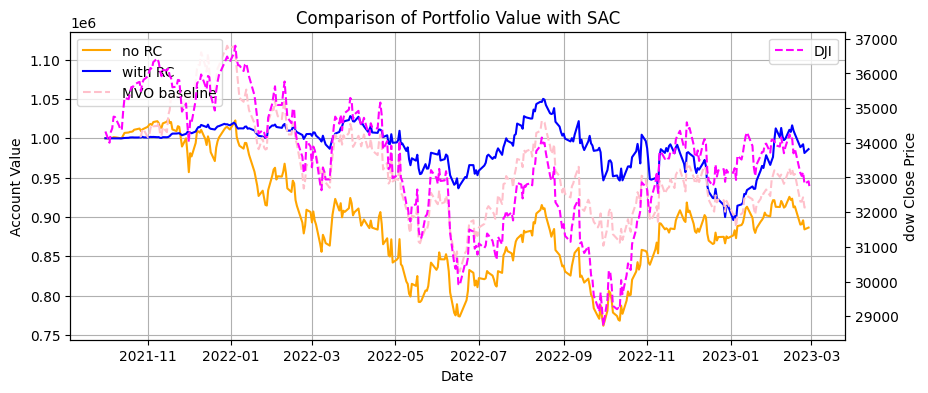

In [107]:

plt.rcParams["figure.figsize"] = (10, 4)

fig, ax1 = plt.subplots()

ax1.plot(dji_sac_no_RC['date'], dji_sac_no_RC['account_value'], label=f'no RC', color='orange')
ax1.plot(dji_sac_w_RC['date'], dji_sac_w_RC['account_value'], label='with RC', color='blue')
ax1.plot(dji_MVO['date'], dji_MVO['Mean Var'], '--', label='MVO baseline', color='pink')

# Setting labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('Account Value')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary axis
ax2 = ax1.twinx()
if set_index is not None:
    ax2.plot(set_index['date'], set_index['close'], '--', label='S&P 500' if index=="snp" else 'DJI', color='magenta')
    ax2.set_ylabel(f'{index} Close Price')
    ax2.legend(loc='upper right')

# Title for the figure
plt.title(f'Comparison of Portfolio Value with {algo.upper()}')

plt.show()



In [116]:
def calculate_rolling_risk(df, column_name='account_value', window=3):
    df['daily_return'] = df[column_name].pct_change()
    df['rolling_risk'] = df['daily_return'].rolling(window).std()
    return df

# Apply the function to each DataFrame if they exist
if dji_sac_no_RC is not None:
    dji_sac_no_RC = calculate_rolling_risk(dji_sac_no_RC)
if dji_sac_w_RC is not None:
    dji_sac_w_RC = calculate_rolling_risk(dji_sac_w_RC)
if dji_MVO is not None:
    MVO_result = calculate_rolling_risk(dji_MVO, 'Mean Var')



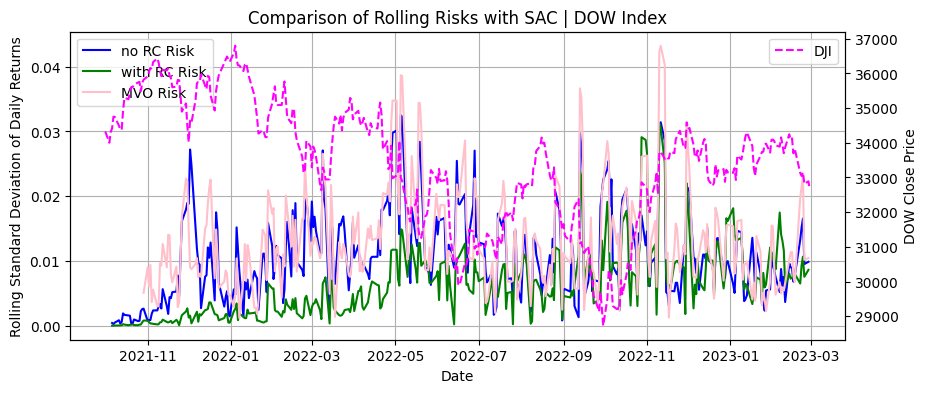

In [117]:
# Define the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot rolling risks for each model on the primary axis
models = {
    'no RC': (dji_sac_no_RC, 'blue'),
    'with RC': (dji_sac_w_RC, 'green'),
    'MVO': (MVO_result, 'pink')
}
for model, (df, color) in models.items():
    if df is not None and 'rolling_risk' in df.columns and 'date' in df.columns:
        ax1.plot(df['date'], df['rolling_risk'], label=f'{model} Risk', color=color)

ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Standard Deviation of Daily Returns')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary axis
ax2 = ax1.twinx()
if set_index is not None:
    ax2.plot(set_index['date'], set_index['close'], '--', label='S&P 500' if index=="snp" else 'DJI', color='magenta')
    ax2.set_ylabel(f'{index.upper()} Close Price')
    ax2.legend(loc='upper right')

# Title for the figure
plt.title(f'Comparison of Rolling Risks with {algo.upper()} | {index.upper()} Index')
plt.show()


# Ablations

In [230]:
algo = "sac"
Ablation_mu =  '/content/drive/My Drive/Sem 2/DL/Project Results/Ablation_mu/'
Ablation_m =  '/content/drive/My Drive/Sem 2/DL/Project Results/Ablation_m/'
Ablation_test_env = '/content/drive/My Drive/Sem 2/DL/Project Results/Ablation_test_env/No_RC_in_test/'

In [232]:
#dji_v1 = pd.read_csv(Ablation + f'DOW/v_0.1/df_{algo}with_RC.csv')
dji_v2 = pd.read_csv(Ablation_test_env + f'df_{algo}with_RC.csv')
dji_v1 = pd.read_csv(DJI_w_RC + f'df_{algo}with_RC.csv')
dji_v3 = pd.read_csv(DJI_no_RC + f'df_{algo}original.csv')
set_index = pd.read_csv('DOW.csv')
dji_MVO = pd.read_csv(DJI_no_RC + 'df_MVOoriginal.csv')

In [233]:
set_index = correct_date(set_index)
dji_v1 = correct_date(dji_v1)
dji_v2 = correct_date(dji_v2)
dji_v3 = correct_date(dji_v3)
dji_MVO = correct_date(dji_MVO)

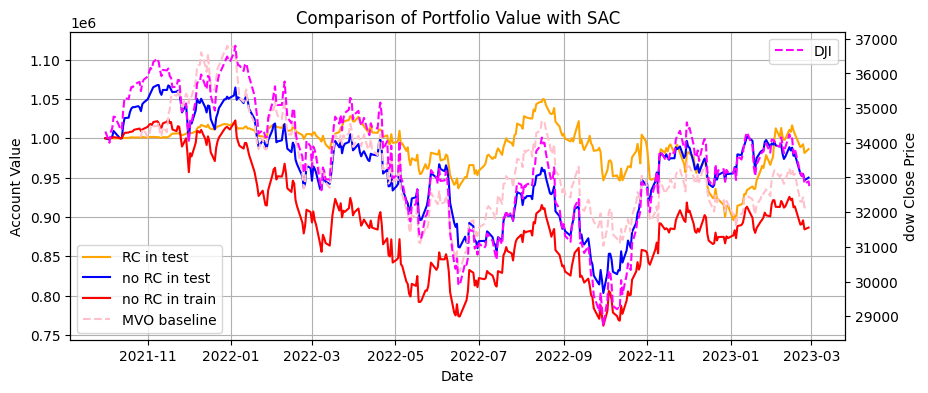

In [240]:

plt.rcParams["figure.figsize"] = (10, 4)

fig, ax1 = plt.subplots()

ax1.plot(dji_v1['date'], dji_v1['account_value'], label=f'RC in test', color='orange')
ax1.plot(dji_v2['date'], dji_v2['account_value'], label='no RC in test', color='blue')
ax1.plot(dji_v3['date'], dji_v3['account_value'], label='no RC in train', color='red')
ax1.plot(dji_MVO['date'], dji_MVO['Mean Var'], '--', label='MVO baseline', color='pink')

# Setting labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('Account Value')
ax1.legend(loc='lower left')
ax1.grid(True)

# Set up the secondary axis
ax2 = ax1.twinx()
if set_index is not None:
    ax2.plot(set_index['date'], set_index['close'], '--', label='S&P 500' if index=="snp" else 'DJI', color='magenta')
    ax2.set_ylabel(f'{index} Close Price')
    ax2.legend(loc='upper right')

# Title for the figure
plt.title(f'Comparison of Portfolio Value with {algo.upper()}')

plt.show()



In [241]:
def calculate_rolling_risk(df, column_name='account_value', window=3):
    df['daily_return'] = df[column_name].pct_change()
    df['rolling_risk'] = df['daily_return'].rolling(window).std()
    return df
dji_v1 = calculate_rolling_risk(dji_v1)
dji_v2 = calculate_rolling_risk(dji_v2)
dji_v3 = calculate_rolling_risk(dji_v3)

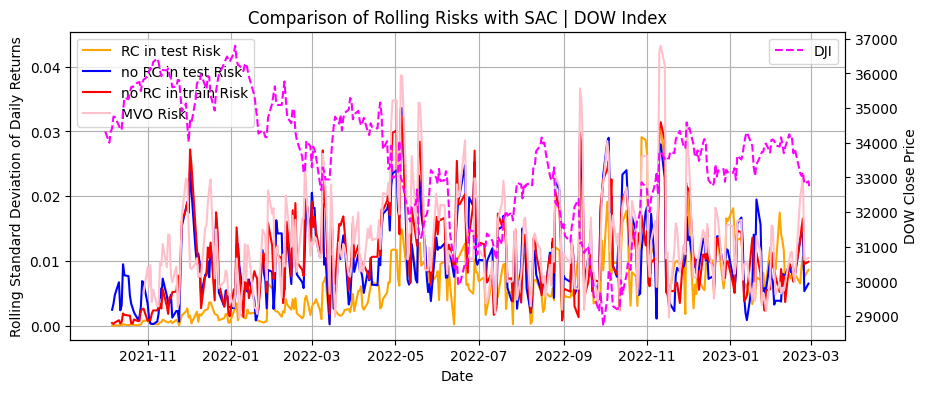

In [244]:
# Define the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot rolling risks for each model on the primary axis
models = {
    'RC in test': (dji_v1, 'orange'),
    'no RC in test': (dji_v2, 'blue'),
    'no RC in train': (dji_v3, 'red'),
    'MVO': (MVO_result, 'pink')
}
for model, (df, color) in models.items():
    if df is not None and 'rolling_risk' in df.columns and 'date' in df.columns:
        ax1.plot(df['date'], df['rolling_risk'], label=f'{model} Risk', color=color)

ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Standard Deviation of Daily Returns')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary axis
ax2 = ax1.twinx()
if set_index is not None:
    ax2.plot(set_index['date'], set_index['close'], '--', label='S&P 500' if index=="snp" else 'DJI', color='magenta')
    ax2.set_ylabel(f'{index.upper()} Close Price')
    ax2.legend(loc='upper right')

# Title for the figure
plt.title(f'Comparison of Rolling Risks with {algo.upper()} | {index.upper()} Index')
plt.show()


# ALL RL ALGOS

In [263]:
SNP_no_RC = '/content/drive/My Drive/Sem 2/DL/Project Results/S&P_no_RC/'
SNP_w_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/S&P_w_RC/'
DJI_no_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/DJI_no_RC/'
DJI_w_RC =  '/content/drive/My Drive/Sem 2/DL/Project Results/DJI_w_RC/'
Ablation =  '/content/drive/My Drive/Sem 2/DL/Project Results/Ablation_V/'

In [278]:
index = "dow"
ds = index
algos = ["a2c", "sac", "td3", "ddpg", "ppo"]

if index == "snp":
  dji_sac_no_RC = pd.read_csv(SNP_no_RC + f'df_sacoriginal.csv')
  dji_td3_no_RC = pd.read_csv(SNP_no_RC + f'df_td3original.csv')
  dji_a2c_no_RC = pd.read_csv(SNP_no_RC + f'df_a2coriginal.csv')
  dji_ddpg_no_RC = pd.read_csv(SNP_no_RC + f'df_ddpgoriginal.csv')
  dji_ppo_no_RC = pd.read_csv(SNP_no_RC + f'df_ppooriginal.csv')
  set_index = pd.read_csv('SNP.csv')
  dji_MVO = pd.read_csv(SNP_no_RC + 'df_MVOoriginal.csv')
  df_dji = pd.read_csv(SNP_no_RC + 'df_dji.csv')
else:
  dji_sac_no_RC = pd.read_csv(DJI_no_RC + f'df_sacoriginal.csv')
  dji_td3_no_RC = pd.read_csv(DJI_no_RC + f'df_td3original.csv')
  dji_a2c_no_RC = pd.read_csv(DJI_no_RC + f'df_a2coriginal.csv')
  dji_ddpg_no_RC = pd.read_csv(DJI_no_RC + f'df_ddpgoriginal.csv')
  dji_ppo_no_RC = pd.read_csv(DJI_no_RC + f'df_ppooriginal.csv')
  set_index = pd.read_csv('DOW.csv')
  dji_MVO = pd.read_csv(DJI_no_RC + 'df_MVOoriginal.csv')
  df_dji = pd.read_csv(DJI_no_RC + 'df_dji.csv')


In [279]:
set_index = correct_date(set_index)
df_account_value_sac = correct_date(dji_sac_no_RC)
df_account_value_td3 = correct_date(dji_td3_no_RC)
df_account_value_a2c = correct_date(dji_a2c_no_RC)
df_account_value_ppo = correct_date(dji_ppo_no_RC)
df_account_value_ddpg = correct_date(dji_ddpg_no_RC)
dji_MVO = correct_date(dji_MVO)
df_dji = correct_date(df_dji)

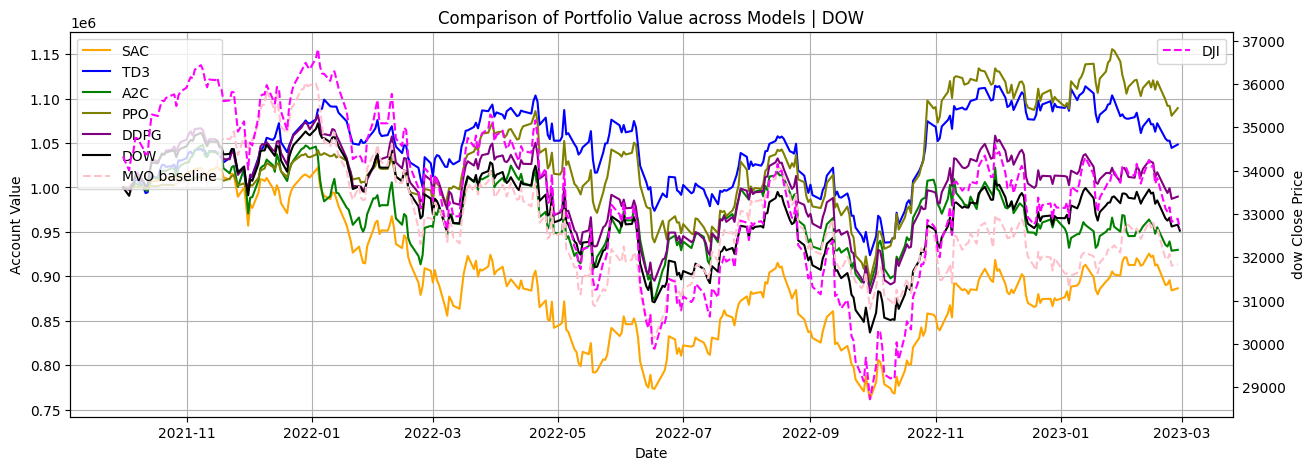

In [280]:

plt.rcParams["figure.figsize"] = (15, 5)

fig, ax1 = plt.subplots()

ax1.plot(df_account_value_sac['date'], df_account_value_sac['account_value'], label=f'SAC', color='orange')
ax1.plot(df_account_value_td3['date'], df_account_value_td3['account_value'], label='TD3', color='blue')
ax1.plot(df_account_value_a2c['date'], df_account_value_a2c['account_value'], label='A2C', color='green')
ax1.plot(df_account_value_ppo['date'], df_account_value_ppo['account_value'], label='PPO', color='olive')
ax1.plot(df_account_value_ddpg['date'], df_account_value_ddpg['account_value'], label='DDPG', color='purple')
ax1.plot(df_dji['date'], df_dji['account_value'], label=f"{index.upper()}", color='black')
ax1.plot(dji_MVO['date'], dji_MVO['Mean Var'], '--', label='MVO baseline', color='pink')

# Setting labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('Account Value')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary axis
ax2 = ax1.twinx()
if set_index is not None:
    ax2.plot(set_index['date'], set_index['close'], '--', label='S&P 500' if index=="snp" else 'DJI', color='magenta')
    ax2.set_ylabel(f'{index} Close Price')
    ax2.legend(loc='upper right')

# Title for the figure
plt.title(f'Comparison of Portfolio Value across Models | {index.upper()}')

plt.show()

